In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [71]:
train.shape, test.shape

((245725, 11), (105312, 10))

In [72]:
train['data'] = 'train'
test['data'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [73]:
data.shape

(351037, 12)

In [74]:
data.dtypes

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
data                    object
dtype: object

In [75]:
data.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
data                        2
dtype: int64

In [76]:
data['Credit_Product'].value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [77]:
data['Credit_Product'].replace(np.nan,'Yes',inplace=True)

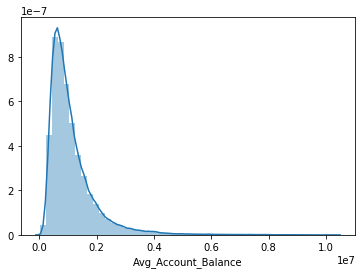

In [78]:
sns.distplot(data['Avg_Account_Balance'])
plt.show()

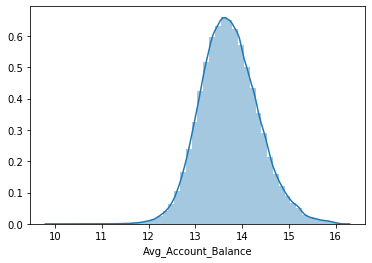

In [79]:
data['Avg_Account_Balance'] = np.log(data['Avg_Account_Balance'])
sns.distplot(data['Avg_Account_Balance'])
plt.show()

In [85]:
data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'data'],
      dtype='object')

In [86]:
data.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,data
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,13.860193,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0.0,train


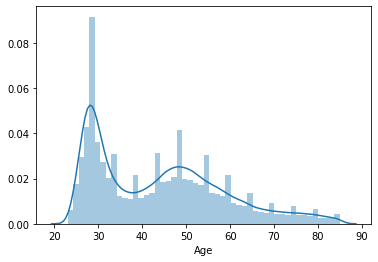

In [87]:
sns.distplot(data['Age'])

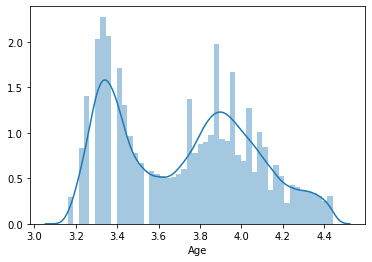

In [88]:
sns.distplot(np.log(data['Age']))

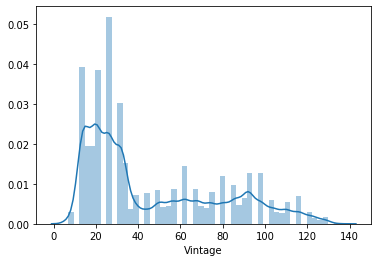

In [89]:
sns.distplot(data['Vintage'])

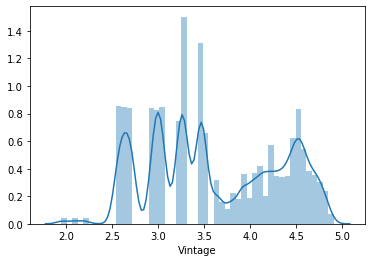

In [90]:
sns.distplot(np.log(data['Vintage']))

In [91]:
df_scaled = data.copy()
col_names = ['Age','Vintage']
features = df_scaled[col_names]

In [92]:
features.head()

,Age,Vintage
0,73,43
1,30,32
2,56,26
3,34,19
4,30,33


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
df_scaled[col_names] = scaler.fit_transform(features.values)

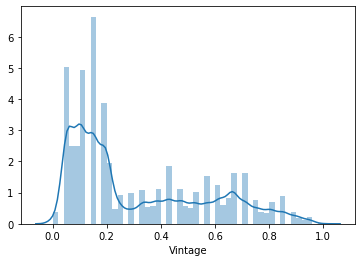

In [95]:
sns.distplot(df_scaled['Vintage'])

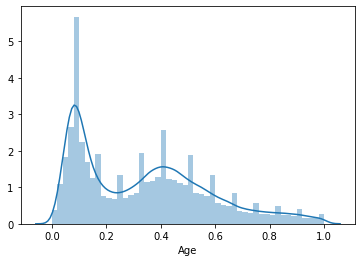

In [96]:
sns.distplot(df_scaled['Age'])

In [97]:
train = data.loc[data['data']=="train"]
test = data.loc[data['data']=="test"]

#Drop unnecessary columns:
test.drop(['ID','Is_Lead','data'],axis=1,inplace=True)
train.drop(['ID','data'],axis=1,inplace=True)

In [98]:
train.shape, test.shape

((245725, 10), (105312, 9))

In [99]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,13.860193,No,0.0
1,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0.0
2,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0.0
3,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0.0
4,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0.0


In [100]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    

#One Hot Coding:
train = pd.get_dummies(train, columns=['Gender', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active'])
test = pd.get_dummies(test, columns=['Gender', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active'])

In [101]:
train.shape

(245725, 19)

In [102]:
# performing freq encoding

dicto = train['Region_Code'].value_counts(normalize=True).to_dict()
train['Region_Code'] = train['Region_Code'].map(dicto)
dicto = test['Region_Code'].value_counts(normalize=True).to_dict()
test['Region_Code'] = test['Region_Code'].map(dicto)

In [103]:
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_0,Gender_1,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,73,0.146237,43,13.860193,0.0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
1,30,0.052197,32,13.274205,0.0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,56,0.146237,26,14.210464,0.0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
3,34,0.031417,19,13.061453,0.0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,30,0.023722,33,13.695360,0.0,1,0,0,0,1,0,1,0,0,0,1,0,1,0


In [104]:
train.dtypes

Age                      int64
Region_Code            float64
Vintage                  int64
Avg_Account_Balance    float64
Is_Lead                float64
Gender_0                 uint8
Gender_1                 uint8
Occupation_0             uint8
Occupation_1             uint8
Occupation_2             uint8
Occupation_3             uint8
Channel_Code_0           uint8
Channel_Code_1           uint8
Channel_Code_2           uint8
Channel_Code_3           uint8
Credit_Product_0         uint8
Credit_Product_1         uint8
Is_Active_0              uint8
Is_Active_1              uint8
dtype: object

In [105]:
from scipy import stats

fitted_data, fitted_lambda = stats.boxcox(np.abs(train['Vintage']))
train['Vintage_box'] = fitted_data
fitted_data, fitted_lambda = stats.boxcox(np.abs(test['Vintage']))
test['Vintage_box'] = fitted_data

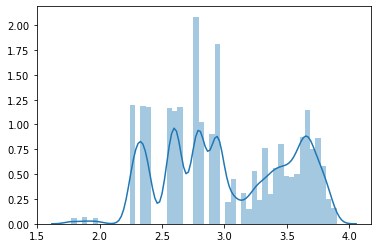

In [106]:
sns.distplot(fitted_data)

In [107]:
#Creating bins for Age,Vintage & Avg Account Balance

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(train['Age'].values.reshape(-1,1))
train['Age_quantiles'] = est.transform(train['Age'].values.reshape(-1,1)).astype(int)
test['Age_quantiles'] = est.transform(test['Age'].values.reshape(-1,1)).astype(int)

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(train['Vintage'].values.reshape(-1,1))
train['Vintage_quantiles'] = est.transform(train['Vintage'].values.reshape(-1,1)).astype(int)
test['Vintage_quantiles'] = est.transform(test['Vintage'].values.reshape(-1,1)).astype(int)

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(train['Avg_Account_Balance'].values.reshape(-1,1))
train['Avg_Account_Balance_quantiles'] = est.transform(train['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)
test['Avg_Account_Balance_quantiles'] = est.transform(test['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)


In [108]:
# train['Avg_Account_Balance_log'] = np.log(train['Avg_Account_Balance'])
# test['Avg_Account_Balance_log'] = np.log(test['Avg_Account_Balance'])

train['Vintage_log'] = np.log(train['Vintage'])
test['Vintage_log'] = np.log(test['Vintage'])

In [109]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

# from sklearn.preprocessing import MaxAbsScaler

# transformer = MaxAbsScaler().fit(X)
# X = transformer.transform(X)
# X_test = transformer.transform(X_test)

# # 20% data as validation set
# X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

# X_train.shape,y_train.shape

In [110]:
train.head()

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_0,Gender_1,Occupation_0,Occupation_1,Occupation_2,...,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1,Vintage_box,Age_quantiles,Vintage_quantiles,Avg_Account_Balance_quantiles,Vintage_log
0,73,0.146237,43,13.860193,0.0,1,0,0,1,0,...,0,1,0,1,0,3.140542,7,4,4,3.761200
1,30,0.052197,32,13.274205,0.0,1,0,0,0,1,...,0,1,0,1,0,2.933900,2,4,1,3.465736
2,56,0.146237,26,14.210464,0.0,1,0,0,0,0,...,0,1,0,0,1,2.785024,6,3,6,3.258097
3,34,0.031417,19,13.061453,0.0,0,1,0,0,1,...,0,1,0,1,0,2.554251,2,1,1,2.944439
4,30,0.023722,33,13.695360,0.0,1,0,0,0,1,...,0,1,0,1,0,2.955704,2,4,3,3.496508


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            245725 non-null  int64  
 1   Region_Code                    245725 non-null  float64
 2   Vintage                        245725 non-null  int64  
 3   Avg_Account_Balance            245725 non-null  float64
 4   Is_Lead                        245725 non-null  float64
 5   Gender_0                       245725 non-null  uint8  
 6   Gender_1                       245725 non-null  uint8  
 7   Occupation_0                   245725 non-null  uint8  
 8   Occupation_1                   245725 non-null  uint8  
 9   Occupation_2                   245725 non-null  uint8  
 10  Occupation_3                   245725 non-null  uint8  
 11  Channel_Code_0                 245725 non-null  uint8  
 12  Channel_Code_1                

In [112]:
#Drop unnecessary columns:
test.drop(['Gender_1','Occupation_3','Channel_Code_3','Credit_Product_1','Is_Active_1'],axis=1,inplace=True)
train.drop(['Gender_1','Occupation_3','Channel_Code_3','Credit_Product_1','Is_Active_1'],axis=1,inplace=True)

In [113]:
X.drop(['Gender_1','Occupation_3','Channel_Code_3','Credit_Product_1','Is_Active_1'],axis=1,inplace=True)

In [114]:
X

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_0,Occupation_0,Occupation_1,Occupation_2,Channel_Code_0,Channel_Code_1,Channel_Code_2,Credit_Product_0,Is_Active_0,Vintage_box,Age_quantiles,Vintage_quantiles,Avg_Account_Balance_quantiles,Vintage_log
0,73,0.146237,43,13.860193,1,0,1,0,0,0,1,1,1,3.140542,7,4,4,3.761200
1,30,0.052197,32,13.274205,1,0,0,1,1,0,0,1,1,2.933900,2,4,1,3.465736
2,56,0.146237,26,14.210464,1,0,0,0,0,0,1,1,0,2.785024,6,3,6,3.258097
3,34,0.031417,19,13.061453,0,0,0,1,1,0,0,1,1,2.554251,2,1,1,2.944439
4,30,0.023722,33,13.695360,1,0,0,1,1,0,0,1,1,2.955704,2,4,3,3.496508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,0.078624,109,14.470741,0,0,0,0,0,0,1,0,1,3.752983,5,7,7,4.691348
245721,27,0.146237,15,13.668114,0,0,0,1,1,0,0,1,0,2.375533,0,1,3,2.708050
245722,26,0.020726,13,13.416016,1,0,0,1,1,0,0,1,1,2.265295,0,0,2,2.564949
245723,28,0.018301,31,12.917806,1,0,0,1,1,0,0,1,1,2.911334,1,3,0,3.433987


In [115]:
# X.drop(['Avg_Account_Balance_quantiles'],axis=1,inplace=True)

In [123]:
X.shape

(245725, 18)

In [64]:
### Using KFold validation technique
from sklearn.model_selection import KFold
# Initializing the fold
kf = KFold(n_splits=10)

# Score
score = []

for train_index, test_index in kf.split(X):

    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [66]:
algos = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),
        RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier(),
        XGBRFClassifier(),CatBoostClassifier(),LGBMClassifier()]

names = ['Logistic Regression', 'DT Classifier','KN Classifier','RF Classifier',
         'GB Classifier','XGBoost Classifier','XGRF Classifier','CatBoost Classifier','Light GBM Classifier']

roc_list = []
roc_prob_list = []

In [59]:
from sklearn.metrics import roc_auc_score

for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    y_pred_prob = model.predict_proba(X_valid)[:,1]
    roc= roc_auc_score(y_valid,y_pred)
    roc_list.append(roc)
    roc_prob= roc_auc_score(y_valid,y_pred_prob)
    roc_prob_list.append(roc_prob)

Learning rate set to 0.103304
0:	learn: 0.6180787	total: 145ms	remaining: 2m 24s
1:	learn: 0.5619385	total: 273ms	remaining: 2m 16s
2:	learn: 0.5195275	total: 399ms	remaining: 2m 12s
3:	learn: 0.4885640	total: 563ms	remaining: 2m 20s
4:	learn: 0.4661551	total: 749ms	remaining: 2m 28s
5:	learn: 0.4482904	total: 851ms	remaining: 2m 20s
6:	learn: 0.4351603	total: 931ms	remaining: 2m 12s
7:	learn: 0.4246275	total: 1.12s	remaining: 2m 18s
8:	learn: 0.4168193	total: 1.23s	remaining: 2m 14s
9:	learn: 0.4108129	total: 1.32s	remaining: 2m 11s
10:	learn: 0.4062356	total: 1.45s	remaining: 2m 10s
11:	learn: 0.4024532	total: 1.55s	remaining: 2m 7s
12:	learn: 0.3988945	total: 1.67s	remaining: 2m 7s
13:	learn: 0.3965800	total: 1.8s	remaining: 2m 7s
14:	learn: 0.3946324	total: 1.91s	remaining: 2m 5s
15:	learn: 0.3928305	total: 2s	remaining: 2m 3s
16:	learn: 0.3914703	total: 2.12s	remaining: 2m 2s
17:	learn: 0.3904997	total: 2.23s	remaining: 2m 1s
18:	learn: 0.3895541	total: 2.36s	remaining: 2m 1s
19:	

157:	learn: 0.3782739	total: 20.1s	remaining: 1m 47s
158:	learn: 0.3782477	total: 20.3s	remaining: 1m 47s
159:	learn: 0.3782296	total: 20.4s	remaining: 1m 47s
160:	learn: 0.3782007	total: 20.5s	remaining: 1m 46s
161:	learn: 0.3781836	total: 20.6s	remaining: 1m 46s
162:	learn: 0.3781514	total: 20.7s	remaining: 1m 46s
163:	learn: 0.3781087	total: 20.9s	remaining: 1m 46s
164:	learn: 0.3780825	total: 21s	remaining: 1m 46s
165:	learn: 0.3780528	total: 21.1s	remaining: 1m 46s
166:	learn: 0.3780309	total: 21.3s	remaining: 1m 46s
167:	learn: 0.3780068	total: 21.4s	remaining: 1m 45s
168:	learn: 0.3779840	total: 21.5s	remaining: 1m 45s
169:	learn: 0.3779527	total: 21.6s	remaining: 1m 45s
170:	learn: 0.3779218	total: 21.7s	remaining: 1m 45s
171:	learn: 0.3779081	total: 21.8s	remaining: 1m 45s
172:	learn: 0.3778724	total: 22s	remaining: 1m 45s
173:	learn: 0.3778569	total: 22.1s	remaining: 1m 44s
174:	learn: 0.3778321	total: 22.2s	remaining: 1m 44s
175:	learn: 0.3777994	total: 22.3s	remaining: 1m 4

313:	learn: 0.3746587	total: 39.3s	remaining: 1m 25s
314:	learn: 0.3746360	total: 39.4s	remaining: 1m 25s
315:	learn: 0.3746155	total: 39.5s	remaining: 1m 25s
316:	learn: 0.3745891	total: 39.7s	remaining: 1m 25s
317:	learn: 0.3745667	total: 39.8s	remaining: 1m 25s
318:	learn: 0.3745470	total: 39.9s	remaining: 1m 25s
319:	learn: 0.3745317	total: 40s	remaining: 1m 25s
320:	learn: 0.3745151	total: 40.1s	remaining: 1m 24s
321:	learn: 0.3744915	total: 40.3s	remaining: 1m 24s
322:	learn: 0.3744649	total: 40.4s	remaining: 1m 24s
323:	learn: 0.3744511	total: 40.5s	remaining: 1m 24s
324:	learn: 0.3744259	total: 40.6s	remaining: 1m 24s
325:	learn: 0.3744061	total: 40.7s	remaining: 1m 24s
326:	learn: 0.3743867	total: 40.8s	remaining: 1m 24s
327:	learn: 0.3743679	total: 40.9s	remaining: 1m 23s
328:	learn: 0.3743508	total: 41s	remaining: 1m 23s
329:	learn: 0.3743370	total: 41.1s	remaining: 1m 23s
330:	learn: 0.3743138	total: 41.3s	remaining: 1m 23s
331:	learn: 0.3742991	total: 41.4s	remaining: 1m 2

470:	learn: 0.3716708	total: 58.8s	remaining: 1m 6s
471:	learn: 0.3716553	total: 58.9s	remaining: 1m 5s
472:	learn: 0.3716320	total: 59s	remaining: 1m 5s
473:	learn: 0.3716152	total: 59.2s	remaining: 1m 5s
474:	learn: 0.3715973	total: 59.3s	remaining: 1m 5s
475:	learn: 0.3715741	total: 59.4s	remaining: 1m 5s
476:	learn: 0.3715525	total: 59.5s	remaining: 1m 5s
477:	learn: 0.3715270	total: 59.6s	remaining: 1m 5s
478:	learn: 0.3715103	total: 59.8s	remaining: 1m 5s
479:	learn: 0.3714897	total: 59.9s	remaining: 1m 4s
480:	learn: 0.3714750	total: 1m	remaining: 1m 4s
481:	learn: 0.3714593	total: 1m	remaining: 1m 4s
482:	learn: 0.3714432	total: 1m	remaining: 1m 4s
483:	learn: 0.3714294	total: 1m	remaining: 1m 4s
484:	learn: 0.3714061	total: 1m	remaining: 1m 4s
485:	learn: 0.3713924	total: 1m	remaining: 1m 4s
486:	learn: 0.3713719	total: 1m	remaining: 1m 4s
487:	learn: 0.3713509	total: 1m	remaining: 1m 3s
488:	learn: 0.3713328	total: 1m 1s	remaining: 1m 3s
489:	learn: 0.3713074	total: 1m 1s	rem

629:	learn: 0.3688545	total: 1m 19s	remaining: 46.6s
630:	learn: 0.3688424	total: 1m 19s	remaining: 46.5s
631:	learn: 0.3688281	total: 1m 19s	remaining: 46.4s
632:	learn: 0.3688163	total: 1m 19s	remaining: 46.2s
633:	learn: 0.3687978	total: 1m 19s	remaining: 46.1s
634:	learn: 0.3687838	total: 1m 19s	remaining: 46s
635:	learn: 0.3687669	total: 1m 20s	remaining: 45.9s
636:	learn: 0.3687543	total: 1m 20s	remaining: 45.8s
637:	learn: 0.3687368	total: 1m 20s	remaining: 45.6s
638:	learn: 0.3687168	total: 1m 20s	remaining: 45.5s
639:	learn: 0.3686925	total: 1m 20s	remaining: 45.4s
640:	learn: 0.3686697	total: 1m 20s	remaining: 45.3s
641:	learn: 0.3686477	total: 1m 20s	remaining: 45.1s
642:	learn: 0.3686325	total: 1m 21s	remaining: 45s
643:	learn: 0.3686098	total: 1m 21s	remaining: 44.9s
644:	learn: 0.3685893	total: 1m 21s	remaining: 44.8s
645:	learn: 0.3685779	total: 1m 21s	remaining: 44.7s
646:	learn: 0.3685679	total: 1m 21s	remaining: 44.5s
647:	learn: 0.3685469	total: 1m 21s	remaining: 44.

785:	learn: 0.3663255	total: 1m 39s	remaining: 27s
786:	learn: 0.3663149	total: 1m 39s	remaining: 26.9s
787:	learn: 0.3663055	total: 1m 39s	remaining: 26.8s
788:	learn: 0.3662862	total: 1m 39s	remaining: 26.6s
789:	learn: 0.3662702	total: 1m 39s	remaining: 26.5s
790:	learn: 0.3662560	total: 1m 39s	remaining: 26.4s
791:	learn: 0.3662371	total: 1m 40s	remaining: 26.3s
792:	learn: 0.3662211	total: 1m 40s	remaining: 26.1s
793:	learn: 0.3662103	total: 1m 40s	remaining: 26s
794:	learn: 0.3661805	total: 1m 40s	remaining: 25.9s
795:	learn: 0.3661653	total: 1m 40s	remaining: 25.8s
796:	learn: 0.3661487	total: 1m 40s	remaining: 25.6s
797:	learn: 0.3661349	total: 1m 40s	remaining: 25.5s
798:	learn: 0.3661144	total: 1m 40s	remaining: 25.4s
799:	learn: 0.3661004	total: 1m 41s	remaining: 25.3s
800:	learn: 0.3660875	total: 1m 41s	remaining: 25.1s
801:	learn: 0.3660743	total: 1m 41s	remaining: 25s
802:	learn: 0.3660579	total: 1m 41s	remaining: 24.9s
803:	learn: 0.3660402	total: 1m 41s	remaining: 24.8s

942:	learn: 0.3640292	total: 1m 59s	remaining: 7.21s
943:	learn: 0.3640186	total: 1m 59s	remaining: 7.09s
944:	learn: 0.3640008	total: 1m 59s	remaining: 6.96s
945:	learn: 0.3639798	total: 1m 59s	remaining: 6.83s
946:	learn: 0.3639593	total: 1m 59s	remaining: 6.71s
947:	learn: 0.3639478	total: 1m 59s	remaining: 6.58s
948:	learn: 0.3639351	total: 2m	remaining: 6.46s
949:	learn: 0.3639232	total: 2m	remaining: 6.33s
950:	learn: 0.3639105	total: 2m	remaining: 6.2s
951:	learn: 0.3638954	total: 2m	remaining: 6.08s
952:	learn: 0.3638831	total: 2m	remaining: 5.95s
953:	learn: 0.3638779	total: 2m	remaining: 5.82s
954:	learn: 0.3638620	total: 2m	remaining: 5.69s
955:	learn: 0.3638439	total: 2m	remaining: 5.57s
956:	learn: 0.3638280	total: 2m 1s	remaining: 5.44s
957:	learn: 0.3638183	total: 2m 1s	remaining: 5.31s
958:	learn: 0.3638037	total: 2m 1s	remaining: 5.19s
959:	learn: 0.3637906	total: 2m 1s	remaining: 5.06s
960:	learn: 0.3637805	total: 2m 1s	remaining: 4.93s
961:	learn: 0.3637648	total: 2m

In [60]:
evaluation = pd.DataFrame({'Model': names,
                           'ROC': roc_list,
                           'ROC_Probability':roc_prob_list})

In [61]:
evaluation

,Model,ROC,ROC_Probability
0,Logistic Regression,0.699474,0.829489
1,DT Classifier,0.653099,0.653085
2,KN Classifier,0.648377,0.752360
3,RF Classifier,0.702321,0.823573
4,GB Classifier,0.731798,0.848540
5,XGBoost Classifier,0.727861,0.848049
6,XGRF Classifier,0.731969,0.848343
7,CatBoost Classifier,0.729218,0.849262
8,Light GBM Classifier,0.734655,0.850198


In [67]:
from sklearn.metrics import roc_auc_score

for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    y_pred_prob = model.predict_proba(X_valid)[:,1]
    roc= roc_auc_score(y_valid,y_pred)
    roc_list.append(roc)
    roc_prob= roc_auc_score(y_valid,y_pred_prob)
    roc_prob_list.append(roc_prob)

Learning rate set to 0.103304
0:	learn: 0.6177449	total: 181ms	remaining: 3m
1:	learn: 0.5649786	total: 298ms	remaining: 2m 28s
2:	learn: 0.5226334	total: 452ms	remaining: 2m 30s
3:	learn: 0.4909718	total: 571ms	remaining: 2m 22s
4:	learn: 0.4669423	total: 718ms	remaining: 2m 22s
5:	learn: 0.4483091	total: 899ms	remaining: 2m 28s
6:	learn: 0.4350612	total: 1.05s	remaining: 2m 28s
7:	learn: 0.4241213	total: 1.19s	remaining: 2m 26s
8:	learn: 0.4161227	total: 1.35s	remaining: 2m 28s
9:	learn: 0.4099791	total: 1.49s	remaining: 2m 27s
10:	learn: 0.4052000	total: 1.64s	remaining: 2m 27s
11:	learn: 0.4014948	total: 1.77s	remaining: 2m 25s
12:	learn: 0.3984077	total: 1.94s	remaining: 2m 27s
13:	learn: 0.3961291	total: 2.06s	remaining: 2m 24s
14:	learn: 0.3942768	total: 2.21s	remaining: 2m 24s
15:	learn: 0.3927167	total: 2.35s	remaining: 2m 24s
16:	learn: 0.3915550	total: 2.48s	remaining: 2m 23s
17:	learn: 0.3904925	total: 2.61s	remaining: 2m 22s
18:	learn: 0.3890999	total: 2.77s	remaining: 2m 

160:	learn: 0.3782058	total: 23.8s	remaining: 2m 3s
161:	learn: 0.3781765	total: 23.9s	remaining: 2m 3s
162:	learn: 0.3781567	total: 24.1s	remaining: 2m 3s
163:	learn: 0.3781363	total: 24.2s	remaining: 2m 3s
164:	learn: 0.3781187	total: 24.3s	remaining: 2m 3s
165:	learn: 0.3780851	total: 24.4s	remaining: 2m 2s
166:	learn: 0.3780675	total: 24.6s	remaining: 2m 2s
167:	learn: 0.3780364	total: 24.8s	remaining: 2m 2s
168:	learn: 0.3780168	total: 24.9s	remaining: 2m 2s
169:	learn: 0.3779697	total: 25s	remaining: 2m 2s
170:	learn: 0.3779443	total: 25.2s	remaining: 2m 2s
171:	learn: 0.3779177	total: 25.3s	remaining: 2m 1s
172:	learn: 0.3778945	total: 25.4s	remaining: 2m 1s
173:	learn: 0.3778652	total: 25.5s	remaining: 2m 1s
174:	learn: 0.3778365	total: 25.7s	remaining: 2m 1s
175:	learn: 0.3778053	total: 25.9s	remaining: 2m 1s
176:	learn: 0.3777815	total: 26s	remaining: 2m 1s
177:	learn: 0.3777582	total: 26.1s	remaining: 2m
178:	learn: 0.3777276	total: 26.3s	remaining: 2m
179:	learn: 0.3776998	

316:	learn: 0.3746040	total: 45.9s	remaining: 1m 38s
317:	learn: 0.3745773	total: 46.1s	remaining: 1m 38s
318:	learn: 0.3745629	total: 46.2s	remaining: 1m 38s
319:	learn: 0.3745416	total: 46.4s	remaining: 1m 38s
320:	learn: 0.3745141	total: 46.5s	remaining: 1m 38s
321:	learn: 0.3744857	total: 46.6s	remaining: 1m 38s
322:	learn: 0.3744729	total: 46.8s	remaining: 1m 38s
323:	learn: 0.3744572	total: 46.9s	remaining: 1m 37s
324:	learn: 0.3744328	total: 47.1s	remaining: 1m 37s
325:	learn: 0.3744131	total: 47.2s	remaining: 1m 37s
326:	learn: 0.3743938	total: 47.4s	remaining: 1m 37s
327:	learn: 0.3743823	total: 47.5s	remaining: 1m 37s
328:	learn: 0.3743616	total: 47.6s	remaining: 1m 37s
329:	learn: 0.3743361	total: 47.8s	remaining: 1m 37s
330:	learn: 0.3743170	total: 47.9s	remaining: 1m 36s
331:	learn: 0.3743023	total: 48.1s	remaining: 1m 36s
332:	learn: 0.3742765	total: 48.3s	remaining: 1m 36s
333:	learn: 0.3742489	total: 48.4s	remaining: 1m 36s
334:	learn: 0.3742273	total: 48.5s	remaining: 

472:	learn: 0.3715789	total: 1m 9s	remaining: 1m 17s
473:	learn: 0.3715616	total: 1m 9s	remaining: 1m 16s
474:	learn: 0.3715449	total: 1m 9s	remaining: 1m 16s
475:	learn: 0.3715266	total: 1m 9s	remaining: 1m 16s
476:	learn: 0.3715014	total: 1m 9s	remaining: 1m 16s
477:	learn: 0.3714800	total: 1m 9s	remaining: 1m 16s
478:	learn: 0.3714666	total: 1m 10s	remaining: 1m 16s
479:	learn: 0.3714545	total: 1m 10s	remaining: 1m 16s
480:	learn: 0.3714390	total: 1m 10s	remaining: 1m 16s
481:	learn: 0.3714156	total: 1m 10s	remaining: 1m 15s
482:	learn: 0.3713989	total: 1m 10s	remaining: 1m 15s
483:	learn: 0.3713846	total: 1m 11s	remaining: 1m 15s
484:	learn: 0.3713626	total: 1m 11s	remaining: 1m 15s
485:	learn: 0.3713434	total: 1m 11s	remaining: 1m 15s
486:	learn: 0.3713265	total: 1m 11s	remaining: 1m 15s
487:	learn: 0.3713112	total: 1m 11s	remaining: 1m 15s
488:	learn: 0.3712919	total: 1m 11s	remaining: 1m 15s
489:	learn: 0.3712817	total: 1m 12s	remaining: 1m 14s
490:	learn: 0.3712648	total: 1m 12

627:	learn: 0.3688811	total: 1m 33s	remaining: 55.3s
628:	learn: 0.3688691	total: 1m 33s	remaining: 55.2s
629:	learn: 0.3688563	total: 1m 33s	remaining: 55s
630:	learn: 0.3688419	total: 1m 33s	remaining: 54.8s
631:	learn: 0.3688235	total: 1m 33s	remaining: 54.7s
632:	learn: 0.3687966	total: 1m 34s	remaining: 54.5s
633:	learn: 0.3687786	total: 1m 34s	remaining: 54.4s
634:	learn: 0.3687654	total: 1m 34s	remaining: 54.2s
635:	learn: 0.3687466	total: 1m 34s	remaining: 54.1s
636:	learn: 0.3687275	total: 1m 34s	remaining: 53.9s
637:	learn: 0.3687095	total: 1m 34s	remaining: 53.7s
638:	learn: 0.3686925	total: 1m 34s	remaining: 53.6s
639:	learn: 0.3686790	total: 1m 35s	remaining: 53.4s
640:	learn: 0.3686676	total: 1m 35s	remaining: 53.3s
641:	learn: 0.3686492	total: 1m 35s	remaining: 53.1s
642:	learn: 0.3686301	total: 1m 35s	remaining: 53s
643:	learn: 0.3686140	total: 1m 35s	remaining: 52.8s
644:	learn: 0.3685984	total: 1m 35s	remaining: 52.7s
645:	learn: 0.3685809	total: 1m 35s	remaining: 52.

783:	learn: 0.3664478	total: 1m 53s	remaining: 31.4s
784:	learn: 0.3664303	total: 1m 54s	remaining: 31.3s
785:	learn: 0.3664123	total: 1m 54s	remaining: 31.1s
786:	learn: 0.3663976	total: 1m 54s	remaining: 31s
787:	learn: 0.3663758	total: 1m 54s	remaining: 30.8s
788:	learn: 0.3663676	total: 1m 54s	remaining: 30.7s
789:	learn: 0.3663505	total: 1m 54s	remaining: 30.5s
790:	learn: 0.3663482	total: 1m 54s	remaining: 30.4s
791:	learn: 0.3663320	total: 1m 55s	remaining: 30.2s
792:	learn: 0.3663198	total: 1m 55s	remaining: 30.1s
793:	learn: 0.3663071	total: 1m 55s	remaining: 29.9s
794:	learn: 0.3662893	total: 1m 55s	remaining: 29.8s
795:	learn: 0.3662686	total: 1m 55s	remaining: 29.6s
796:	learn: 0.3662507	total: 1m 55s	remaining: 29.5s
797:	learn: 0.3662389	total: 1m 55s	remaining: 29.4s
798:	learn: 0.3662246	total: 1m 56s	remaining: 29.2s
799:	learn: 0.3662064	total: 1m 56s	remaining: 29.1s
800:	learn: 0.3661870	total: 1m 56s	remaining: 28.9s
801:	learn: 0.3661620	total: 1m 56s	remaining: 2

941:	learn: 0.3639639	total: 2m 17s	remaining: 8.48s
942:	learn: 0.3639582	total: 2m 17s	remaining: 8.34s
943:	learn: 0.3639463	total: 2m 18s	remaining: 8.19s
944:	learn: 0.3639338	total: 2m 18s	remaining: 8.05s
945:	learn: 0.3639160	total: 2m 18s	remaining: 7.9s
946:	learn: 0.3639054	total: 2m 18s	remaining: 7.76s
947:	learn: 0.3638909	total: 2m 18s	remaining: 7.61s
948:	learn: 0.3638725	total: 2m 18s	remaining: 7.47s
949:	learn: 0.3638557	total: 2m 19s	remaining: 7.32s
950:	learn: 0.3638383	total: 2m 19s	remaining: 7.17s
951:	learn: 0.3638229	total: 2m 19s	remaining: 7.03s
952:	learn: 0.3638148	total: 2m 19s	remaining: 6.88s
953:	learn: 0.3637980	total: 2m 19s	remaining: 6.74s
954:	learn: 0.3637830	total: 2m 19s	remaining: 6.59s
955:	learn: 0.3637725	total: 2m 19s	remaining: 6.44s
956:	learn: 0.3637565	total: 2m 20s	remaining: 6.3s
957:	learn: 0.3637437	total: 2m 20s	remaining: 6.15s
958:	learn: 0.3637297	total: 2m 20s	remaining: 6s
959:	learn: 0.3637215	total: 2m 20s	remaining: 5.86

In [68]:
evaluation = pd.DataFrame({'Model': names,
                           'ROC': roc_list,
                           'ROC_Probability':roc_prob_list})

evaluation

,Model,ROC,ROC_Probability
0,Logistic Regression,0.696937,0.829320
1,DT Classifier,0.655903,0.655890
2,KN Classifier,0.667209,0.769249
3,RF Classifier,0.702486,0.822514
4,GB Classifier,0.731798,0.848540
5,XGBoost Classifier,0.727861,0.848049
6,XGRF Classifier,0.733202,0.848290
7,CatBoost Classifier,0.729485,0.849022
8,Light GBM Classifier,0.735397,0.849994


In [124]:
X.shape

(245725, 18)

In [116]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [117]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [118]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.378257
[800]	valid_0's binary_logloss: 0.378101
Early stopping, best iteration is:
[867]	valid_0's binary_logloss: 0.378072
roc_auc_score: 0.8538866080884636
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382525
Early stopping, best iteration is:
[561]	valid_0's binary_logloss: 0.382459
roc_auc_score: 0.8496391921056294
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.384432
[800]	valid_0's binary_logloss: 0.384258
Early stopping, best iteration is:
[714]	valid_0's binary_logloss: 0.384246
roc_auc_score: 0.8476609403156027
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 

In [121]:
X_train.shape

(221153, 17)

In [122]:
lgb_model.feature_importances_

array([1429,  772, 1376,  907,   54,   88,  161,  245,  144,  118,  100,
        241,  212,    0,    0,    0,   48,    0])

In [134]:
# importances = pd.Series(lgb_model.feature_importances_,index=X_train.columns)
# importances.plot(kind='barh',figsize=(12,8))`

In [125]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

In [126]:
from xgboost import XGBClassifier
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)

Fold: 0
[0]	validation_0-error:0.23719
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.18408
[800]	validation_0-error:0.17756
Stopping. Best iteration:
[1075]	validation_0-error:0.17547

roc_auc_score: 0.8507834720235494
--------------------------------------------------
Fold: 1
[0]	validation_0-error:0.23719
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.18624
[800]	validation_0-error:0.18027
Stopping. Best iteration:
[722]	validation_0-error:0.18002

roc_auc_score: 0.8468432538142614
--------------------------------------------------
Fold: 2
[0]	validation_0-error:0.23719
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.18745
[800]	validation_0-error:0.17983
Stopping. Best iteration:
[846]	validation_0-error:0.17928

roc_auc_score: 0.8446524988809693
--------------------------------------------------
Fold: 3
[0]	validation_0-error:0.23723
Will trai

In [132]:
# importances = pd.Series(xgb_model.feature_importances_,index=X_train.columns)
# importances.plot(kind='barh',figsize=(12,8))

In [133]:
# cat_params= {'n_estimators': 20000, 
#                   'depth': 4, 
#                   'learning_rate': 0.023, 
#                   'colsample_bylevel': 0.655, 
#                   'bagging_temperature': 0.921, 
#                   'l2_leaf_reg': 10.133}

# from catboost import CatBoostClassifier
# cat_model = cross_val(X, y, CatBoostClassifier, cat_params)

In [ ]:
importances = pd.Series(cat_model.feature_importances_,index=X_train.columns)
importances.plot(kind='barh',figsize=(12,8))

In [129]:
pred_test_lgb = lgb_model.predict_proba(test)[:,1]
pred_test_xgb = xgb_model.predict_proba(test)[:,1]
# pred_test_cat = cat_model.predict_proba(test)[:,1]
# prediction = (pred_test_lgb + pred_test_cat+pred_test_xgb)/3

In [130]:
sample_submission = pd.read_csv('sample_submission_eyYijxG.csv')

# sample_submission['Is_Lead'] = prediction
# submission.to_csv('my_submissionall.csv', index=False)

In [131]:
sample_submission['Is_Lead'] = pred_test_lgb
sample_submission.to_csv('pred_test_lgb_one.csv',index=False)

sample_submission['Is_Lead'] = pred_test_xgb
sample_submission.to_csv('pred_test_xgb_one.csv',index=False)

# sample_submission['Is_Lead'] = pred_test_cat
# sample_submission.to_csv('pred_test_cat_one.csv',index=False)